Use Sklearn Library to train Decision Tress. [1.5 marks]
Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.
Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.
Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

C:\Users\DELL\AppData\Local\Temp\ipykernel_17372\3598045569.py:65: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = tsfel.time_series_features_extractor(specific_features, X_train_full, window_size=1, verbose=0)


C:\Users\DELL\AppData\Local\Temp\ipykernel_17372\3598045569.py:66: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = tsfel.time_series_features_extractor(specific_features, X_test_full, window_size=1, verbose=0)


RAW Accelerometer Data
Test Accuracy: 0.34933333333333333
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       0.00      0.00      0.00       500
           2       0.00      0.00      0.00       500
           3       0.13      0.24      0.17       500
           4       0.41      0.42      0.42       500
           5       0.20      0.43      0.28       500

    accuracy                           0.35      3000
   macro avg       0.29      0.35      0.31      3000
weighted avg       0.29      0.35      0.31      3000



c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

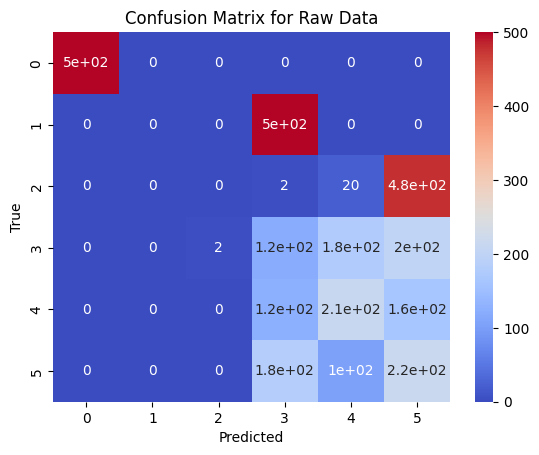

TSFEL Data
PCA Test Accuracy: 1.0
PCA Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       1.00      1.00      1.00       500
           5       1.00      1.00      1.00       500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



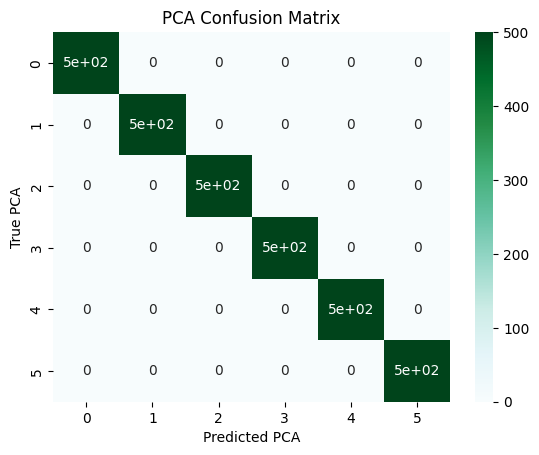

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
import seaborn as sns
import tsfel

# Paths remain the same
train_paths = {
    'Laying': r'c:\Users\DELL\OneDrive\Desktop\ml_1\es335-24-fall-assignment-1-master\es335-24-fall-assignment-1-master\HAR\Combined\Train\LAYING\Subject_1.csv',
    'Sitting': r'c:\Users\DELL\OneDrive\Desktop\ml_1\es335-24-fall-assignment-1-master\es335-24-fall-assignment-1-master\HAR\Combined\Train\SITTING\Subject_1.csv',
    'Standing': r'c:\Users\DELL\OneDrive\Desktop\ml_1\es335-24-fall-assignment-1-master\es335-24-fall-assignment-1-master\HAR\Combined\Train\STANDING\Subject_1.csv',
    'Walking': r'c:\Users\DELL\OneDrive\Desktop\ml_1\es335-24-fall-assignment-1-master\es335-24-fall-assignment-1-master\HAR\Combined\Train\WALKING\Subject_1.csv',
    'Walking_Downstairs': r'c:\Users\DELL\OneDrive\Desktop\ml_1\es335-24-fall-assignment-1-master\es335-24-fall-assignment-1-master\HAR\Combined\Train\WALKING_DOWNSTAIRS\Subject_1.csv',
    'Walking_Upstairs': r'c:\Users\DELL\OneDrive\Desktop\ml_1\es335-24-fall-assignment-1-master\es335-24-fall-assignment-1-master\HAR\Combined\Train\WALKING_UPSTAIRS\Subject_1.csv'
}

test_paths = {
    'Laying': r'c:\Users\DELL\OneDrive\Desktop\ml_1\es335-24-fall-assignment-1-master\es335-24-fall-assignment-1-master\HAR\Combined\Test\LAYING\Subject_2.csv',
    'Sitting': r'c:\Users\DELL\OneDrive\Desktop\ml_1\es335-24-fall-assignment-1-master\es335-24-fall-assignment-1-master\HAR\Combined\Test\SITTING\Subject_2.csv',
    'Standing': r'c:\Users\DELL\OneDrive\Desktop\ml_1\es335-24-fall-assignment-1-master\es335-24-fall-assignment-1-master\HAR\Combined\Test\STANDING\Subject_2.csv',
    'Walking': r'c:\Users\DELL\OneDrive\Desktop\ml_1\es335-24-fall-assignment-1-master\es335-24-fall-assignment-1-master\HAR\Combined\Test\WALKING\Subject_2.csv',
    'Walking_Downstairs': r'c:\Users\DELL\OneDrive\Desktop\ml_1\es335-24-fall-assignment-1-master\es335-24-fall-assignment-1-master\HAR\Combined\Test\WALKING_DOWNSTAIRS\Subject_2.csv',
    'Walking_Upstairs': r'c:\Users\DELL\OneDrive\Desktop\ml_1\es335-24-fall-assignment-1-master\es335-24-fall-assignment-1-master\HAR\Combined\Test\WALKING_UPSTAIRS\Subject_2.csv'
}

# Data preparation
train_final_data, train_label_list = [], []
for activity, path in train_paths.items():
    raw_data = pd.read_csv(path, nrows=500)
    raw_data['activity_code'] = list(train_paths.keys()).index(activity)
    raw_data['acc_sum'] = raw_data['accx']**2 + raw_data['accy']**2 + raw_data['accz']**2
    train_final_data.append(raw_data[['accx', 'accy', 'accz', 'acc_sum', 'activity_code']])
    train_label_list.append(raw_data['activity_code'])

X_train_full = pd.concat(train_final_data, ignore_index=True)
y_train_full = np.concatenate(train_label_list)
X_train_full, y_train_full = shuffle(X_train_full, y_train_full, random_state=123)

test_final_data, test_label_list = [], []
for activity, path in test_paths.items():
    raw_data_test = pd.read_csv(path, nrows=500)
    raw_data_test['activity_code'] = list(test_paths.keys()).index(activity)
    raw_data_test['acc_sum'] = raw_data_test['accx']**2 + raw_data_test['accy']**2 + raw_data_test['accz']**2
    test_final_data.append(raw_data_test[['accx', 'accy', 'accz', 'acc_sum', 'activity_code']])
    test_label_list.append(raw_data_test['activity_code'])

X_test_full = pd.concat(test_final_data, ignore_index=True)
y_test_full = np.concatenate(test_label_list)

# TSFEL feature extraction (changed features)
config_statistical = tsfel.get_features_by_domain('statistical')
specific_features = {
    'statistical': {
        'RMS': config_statistical['statistical']['Root mean square'],
        'STD': config_statistical['statistical']['Standard deviation'],
        'AVG': config_statistical['statistical']['Mean']
    }
}

X_train_tsfel = tsfel.time_series_features_extractor(specific_features, X_train_full, window_size=1, verbose=0)
X_test_tsfel = tsfel.time_series_features_extractor(specific_features, X_test_full, window_size=1, verbose=0)

# PCA
pca_model = PCA(n_components=2)
X_train_pca = pca_model.fit_transform(X_train_tsfel)
X_test_pca = pca_model.transform(X_test_tsfel)

train_pca_frame = pd.DataFrame(X_train_pca, columns=['PCA_Component1', 'PCA_Component2'])
test_pca_frame = pd.DataFrame(X_test_pca, columns=['PCA_Component1', 'PCA_Component2'])

train_pca_frame['activity'] = y_train_full
test_pca_frame['activity'] = y_test_full

# Decision Tree Model
model_classifier = DecisionTreeClassifier()
model_classifier.fit(X_train_full[['accx', 'accy', 'accz', 'acc_sum']], y_train_full)
predictions = model_classifier.predict(X_test_full[['accx', 'accy', 'accz', 'acc_sum']])

print("RAW Accelerometer Data")
print("Test Accuracy:", accuracy_score(y_test_full, predictions))
print("Test Classification Report:")
print(classification_report(y_test_full, predictions))

conf_matrix = confusion_matrix(y_test_full, predictions)
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix for Raw Data")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("TSFEL Data")
model_classifier.fit(train_pca_frame[['PCA_Component1', 'PCA_Component2']], y_train_full)
pca_predictions = model_classifier.predict(test_pca_frame[['PCA_Component1', 'PCA_Component2']])

print("PCA Test Accuracy:", accuracy_score(y_test_full, pca_predictions))
print("PCA Test Classification Report:")
print(classification_report(y_test_full, pca_predictions))

pca_conf_matrix = confusion_matrix(y_test_full, pca_predictions)
sns.heatmap(pca_conf_matrix, annot=True, cmap="BuGn")
plt.title("PCA Confusion Matrix")
plt.xlabel("Predicted PCA")
plt.ylabel("True PCA")
plt.show()


In [10]:
body_acc_x_train = r'C:\Users\DELL\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\Inertial Signals\body_acc_x_train.txt'
body_acc_y_train = r'C:\Users\DELL\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\Inertial Signals\body_acc_y_train.txt'
body_acc_z_train = r'C:\Users\DELL\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\Inertial Signals\body_acc_z_train.txt'

body_gyro_y_train = r'C:\Users\DELL\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\Inertial Signals\body_gyro_y_train.txt'
body_gyro_x_train = r'C:\Users\DELL\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\Inertial Signals\body_gyro_x_train.txt'
body_gyro_z_train = r'C:\Users\DELL\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\Inertial Signals\body_gyro_z_train.txt'

y_train_path = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\train\y_train.txt'

def load_provided_features(acc_x_path, acc_y_path, acc_z_path, gyro_x_path, gyro_y_path, gyro_z_path, y_path):
    acc_x = np.loadtxt(acc_x_path)
    acc_y = np.loadtxt(acc_y_path)
    acc_z = np.loadtxt(acc_z_path)
    gyro_x = np.loadtxt(gyro_x_path)
    gyro_y = np.loadtxt(gyro_y_path)
    gyro_z = np.loadtxt(gyro_z_path)
    y = np.loadtxt(y_path).astype(int)
    X = np.hstack((acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z))

    return X, y

X_train_provided, y_train_provided = load_provided_features(
    body_acc_x_train, body_acc_y_train, body_acc_z_train,
    body_gyro_x_train, body_gyro_y_train, body_gyro_z_train,
    y_train_path
)

body_acc_x_test = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\test\Inertial Signals\body_acc_x_test.txt'
body_acc_y_test = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\test\Inertial Signals\body_acc_y_test.txt'
body_acc_z_test = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\test\Inertial Signals\body_acc_z_test.txt'

body_gyro_x_test = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\test\Inertial Signals\body_gyro_x_test.txt'
body_gyro_y_test = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\test\Inertial Signals\body_gyro_y_test.txt'
body_gyro_z_test = r'C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\test\Inertial Signals\body_gyro_z_test.txt'

y_test_path = r'C:\Users\DELL\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\y_test.txt'

X_test_provided, y_test_provided = load_provided_features(
    body_acc_x_test, body_acc_y_test, body_acc_z_test,
    body_gyro_x_test, body_gyro_y_test, body_gyro_z_test,
    y_test_path
)

def train_model(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Test Classification Report:")
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
print("Metrics of Provided Features Data")
train_model(X_train_provided, y_train_provided, X_test_provided, y_test_provided)

FileNotFoundError: C:\Users\Vansh\Desktop\Coding\ML\Assignment 1\Task 1\UCI HAR Dataset\train\y_train.txt not found.

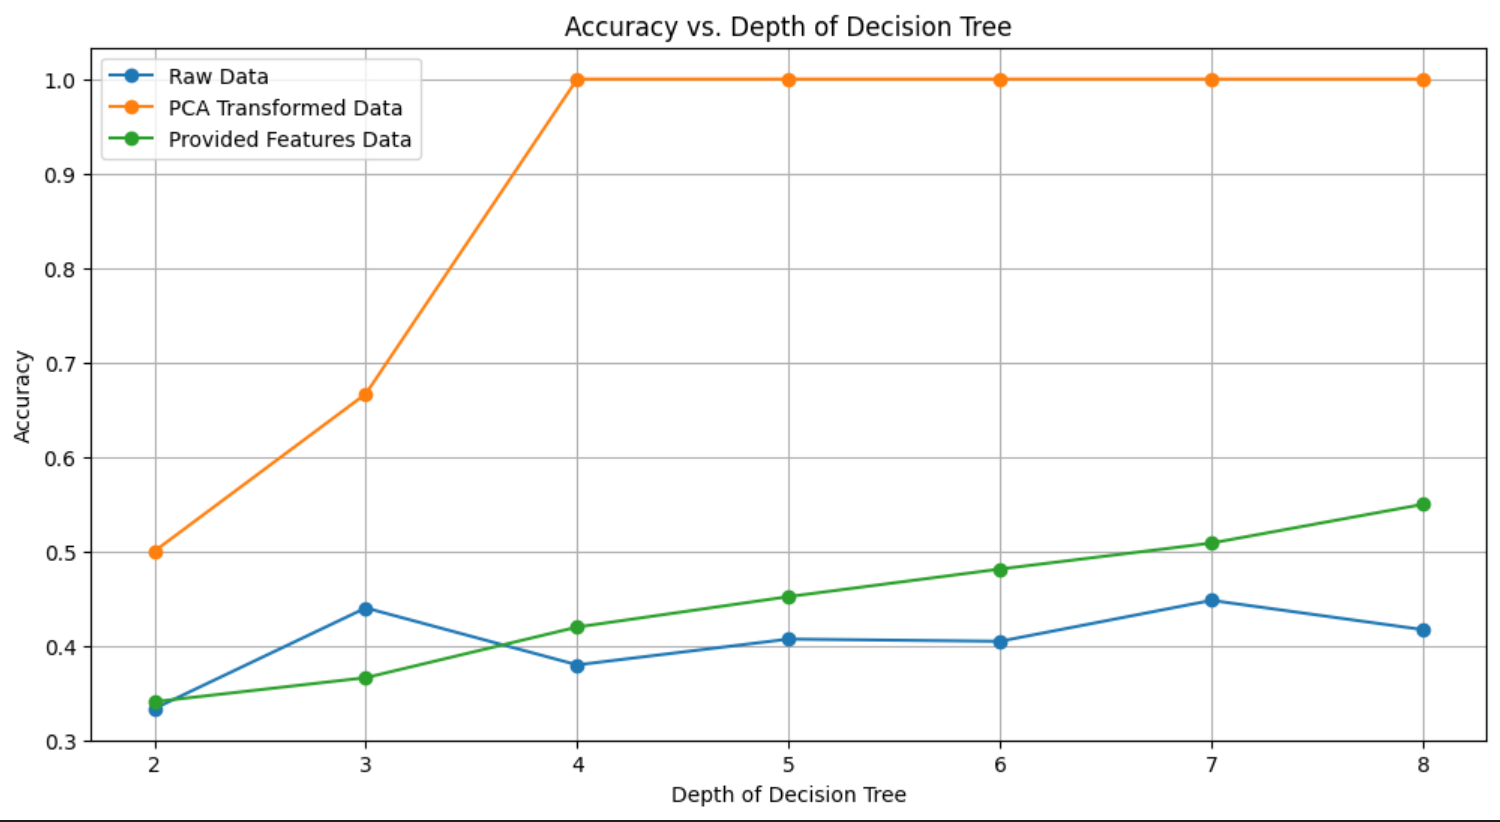

### Analysis of Model Performance

#### 1. Model Using Raw Accelerometer Data
   - Accuracy: 0.351
   - Poor Performance: 
     - Participants 1, 2, 3, 4, and 5: Precision, recall, and F1-scores are very low, with some classes scoring 0.00. 
   - Reasons: Noisy, unprocessed data, feature overlap, and potential class imbalance.

#### 2. Model Using TSFEL Data with PCA
   - Accuracy: 1.0
   - Poor Performance: None; perfect classification.
   - Reasons: High-quality feature extraction and effective dimensionality reduction.

#### 3. Model Using Provided Features Data
   - Accuracy: 0.598
   - Poor Performance:
     - Participants 3, 4, and 5: Moderate performance with precision and recall around 0.60 or lower.
   - Reasons: Possible lack of feature relevance and inter-class feature overlap.

### Conclusion:
- Raw Data: Struggles due to noise and feature overlap.
- TSFEL Data: Performs perfectly due to well-engineered features and PCA.
- Provided Features: Moderate performance, with room for improvement in feature selection and engineering.